<a href="https://colab.research.google.com/github/ranaehelal/Movie-Review-Sentiment/blob/main/IMDB%20Dataset%20of%2050K%20Movie%20Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

100%|██████████| 25.7M/25.7M [00:00<00:00, 152MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
import pandas as pd
import numpy as np

file_path = "/root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/IMDB Dataset.csv"

df = pd.read_csv(file_path)

print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
df.shape

(50000, 2)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [8]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


<ipython-input-9-29f4562d3d50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="coolwarm")


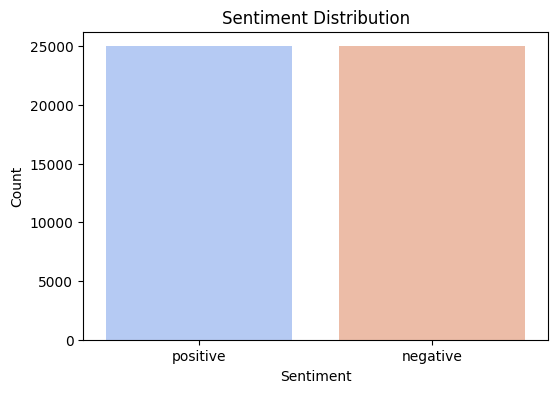

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


## Classification
### Negative = 0
### Positive = 1

In [10]:
df.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)

<ipython-input-10-00b3046a1d3c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)


In [11]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [12]:
df['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


# preprocessing text data

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word to its base

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english')) # words like 'the', 'is', 'in .


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I)
    text = text.lower()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

    return text


In [15]:
df['review'] = df['review'].apply(clean_text)


In [16]:
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode you...,1
1,wonderful little production br /><br />the fil...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake) think ...,0
4,"petter matteis love time money"" visually stunn...",1
